<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-dataset-by-country,-year-and-cities" data-toc-modified-id="Merging-dataset-by-country,-year-and-cities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging dataset by country, year and cities</a></span></li><li><span><a href="#Summarize-gas-emissions-by-cities" data-toc-modified-id="Summarize-gas-emissions-by-cities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summarize gas emissions by cities</a></span></li></ul></div>

In [25]:
#Import required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import functools
import re

## Merging dataset by country, year and cities

In [26]:
#Import CDP Clean Cities Emissions Dataset
CDP_df = pd.read_csv("../data/02_output/00_CDP_Clean.csv")

In [27]:
#Import External Clean Dataset 
EXT1_df = pd.read_csv("../data/02_output/00_ExternalCountry_Clean.csv")
EXT2_df = pd.read_csv("../data/02_output/00_ExternalCity_Clean.csv")

In [28]:
CDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       997 non-null    object 
 1   City                               997 non-null    object 
 2   Year                               997 non-null    int64  
 3   Country Name                       997 non-null    object 
 4   CDP_Region                         967 non-null    object 
 5   CDP_Municipality                   997 non-null    object 
 6   CDP_id                             997 non-null    int64  
 7   CDP_Date_measure                   996 non-null    float64
 8   CDP_Latitude                       961 non-null    float64
 9   CDP_Longitude                      961 non-null    float64
 10  CDP_Altitude                       365 non-null    float64
 11  CDP_GDP                            300 non-null    float64

In [29]:
EXT1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country Code                              7015 non-null   object 
 1   Year                                      7015 non-null   int64  
 2   Country Name                              7015 non-null   object 
 3   OWID_iso_code                             1480 non-null   object 
 4   OWID_co2                                  1484 non-null   float64
 5   OWID_co2_growth_prct                      1427 non-null   float64
 6   OWID_co2_growth_abs                       1427 non-null   float64
 7   OWID_consumption_co2                      812 non-null    float64
 8   OWID_trade_co2                            807 non-null    float64
 9   OWID_trade_co2_share                      807 non-null    float64
 10  OWID_co2_per_capita                 

In [30]:
EXT2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         1994 non-null   object 
 1   City                 1994 non-null   object 
 2   Year                 1994 non-null   int64  
 3   Country Name         1994 non-null   object 
 4   Temp_AvgTemperature  1994 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.0+ KB


Only cases with Emissions are keep, and country information is add to this tuples

In [31]:
Main1_df = CDP_df.merge(EXT1_df, how = 'left', on = ['Country Code', 'Year', 'Country Name'])
Main1_df.shape
#Main1_df.head()

(997, 104)

All tuples from EXT2 are merged with Emissions in order to have information from cities even if the year dont have information in emissions

In [32]:
Main2_df = Main1_df.merge(EXT2_df, how = 'left', on = ['Country Code', 'Year', 'City', 'Country Name'])
Main2_df.shape
#Main2_df.head()

(997, 105)

In [33]:
#Main2_df = Main2_df.set_index(['Country Code', 'City', 'Year'])

In [34]:
Main2_df[Main2_df['City'].str.contains("Abington")]

,Country Code,City,Year,Country Name,CDP_Region,CDP_Municipality,CDP_id,CDP_Date_measure,CDP_Latitude,CDP_Longitude,...,GDP_Fiscal Health,GDP_Business Freedom,GDP_Labor Freedom,GDP_Monetary Freedom,GDP_Trade Freedom,GDP_Investment Freedom,GDP_Financial Freedom,HDI_HDI Rank,HDI_HDI,Temp_AvgTemperature
681,USA,Abington,2016,United States,North America,Abington Township,58485,2010.0,40.1,-75.1,...,nan,84.7,91.4,77.0,87.0,70.0,70.0,17.0,0.9,nan
682,USA,Abington,2017,United States,North America,Abington Township,58485,2010.0,40.1,-75.1,...,53.3,84.4,91.0,80.1,87.1,80.0,70.0,17.0,0.9,nan


Compare equal variables from different sources and fill if necessary

In [35]:
#Main2_df[['OWID_gdp','GDP_GDP']].isna().sum()/len(Main2_df)
Main2_df[['OWID_population','POP_Population']].isna().sum()/len(Main2_df)

OWID_population   0.2
POP_Population    0.1
dtype: float64

In [36]:
Main2_df[['Country Name', 'City','Year','OWID_gdp','GDP_GDP']]
Main2_df[['Country Name', 'City','Year','OWID_population','POP_Population']]

,Country Name,City,Year,OWID_population,POP_Population
0,Albania,Tirana,2017,2884000.0,59.4
1,Argentina,Buenos Aires,2013,42196000.0,91.2
2,Argentina,Buenos Aires,2014,42638000.0,91.4
3,Argentina,Buenos Aires,2015,43075000.0,91.5
4,Argentina,Buenos Aires,2016,43508000.0,91.6
5,Argentina,Buenos Aires,2017,43937000.0,91.7
6,Argentina,Buenos Aires,2018,44361000.0,91.9
7,Argentina,Buenos Aires,2019,nan,92.0
8,Argentina,Cordoba,2017,43937000.0,91.7
9,Argentina,Cordoba,2018,44361000.0,91.9


In [37]:
Main2_df.drop(['OWID_iso_code', 'OWID_gdp', 'OWID_population','HDI_HDI Rank'], axis = 1, inplace = True)

In [38]:
Main2_df.columns

Index(['Country Code', 'City', 'Year', 'Country Name', 'CDP_Region',
       'CDP_Municipality', 'CDP_id', 'CDP_Date_measure', 'CDP_Latitude',
       'CDP_Longitude',
       ...
       'GDP_Government Spending', 'GDP_Fiscal Health', 'GDP_Business Freedom',
       'GDP_Labor Freedom', 'GDP_Monetary Freedom', 'GDP_Trade Freedom',
       'GDP_Investment Freedom', 'GDP_Financial Freedom', 'HDI_HDI',
       'Temp_AvgTemperature'],
      dtype='object', length=101)

## Summarize gas emissions by cities

The year percentage of change was calculated for each city using the pct_change function  

pct_change = $\frac{(A_1 - A_0)}{A_0}$ 

When no more than one year is found pct_change was fixed to 0 (no change).  
Positive values means a reduction in gas emission, 0 means no movement and negative values means no reduction

In [39]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
Main2_df.pivot_table(index =['Country Code', 'Country Name'], 
                     columns = 'Year', 
                     values = 'CDP_TotalEmissions', 
                     aggfunc = max).reset_index()

Year,Country Code,Country Name,2013,2014,2015,2016,2017,2018,2019,2020
0,ALB,Albania,nan,nan,nan,nan,610773.0,nan,nan,nan
1,ARG,Argentina,9813932.7,9886932.0,11438694.0,19667128.0,13193864.0,61862524.0,13100079.0,810086.0
2,AUS,Australia,5457064.0,6442240.0,5805437.0,4372420.0,5319010.0,4678193.0,3677319.0,3682686.2
3,BGR,Bulgaria,nan,nan,nan,nan,1104.0,5124843.0,5124843.0,4628030.0
4,BOL,Bolivia,nan,1440.5,1321.4,1426533.8,nan,nan,nan,nan
5,BRA,Brazil,15115000.0,20758240.0,20268045.0,20268045.0,17006642.0,17006642.0,16130962.0,16130962.0
6,CAN,Canada,20662821.4,20662821.4,20313061.0,18320966.0,20043240.0,217306157.0,18438546.0,18042522.0
7,CHE,Switzerland,1973200.0,2053157.0,2053157.0,1822367.0,1822367.0,1374757.0,111703.0,nan
8,CHL,Chile,19592190.0,nan,19592190.0,23120027.8,28406420.0,nan,23183210.0,23173131.0
9,COL,Colombia,15757161.9,16077576.2,13217521.1,12359324.5,17672009.0,3414204.0,903738.0,10385660.0


In [40]:
#pd.set_option('display.max_rows', None)
Main2_df['CDP_pct_change'] = Main2_df.groupby(['Country Code','City'])['CDP_TotalEmissions'].pct_change()
Main2_df['CDP_pct_change'].fillna(0,inplace = True)

In [41]:
Main2_df.dtypes
#CDPFinal

Country Code                                 object
City                                         object
Year                                          int64
Country Name                                 object
CDP_Region                                   object
CDP_Municipality                             object
CDP_id                                        int64
CDP_Date_measure                            float64
CDP_Latitude                                float64
CDP_Longitude                               float64
CDP_Altitude                                float64
CDP_GDP                                     float64
CDP_Land_Area                               float64
CDP_Population                              float64
CDP_Temperature                             float64
CDP_EmissionsScope1                         float64
CDP_EmissionsScope2                         float64
CDP_EmissionsScope3                         float64
CDP_TotalEmissions                          float64
CDP_Total+Em

Text(100000000, 800000, 'Report Inconsistencies')

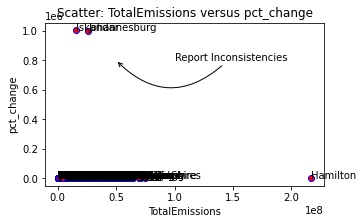

In [42]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=Main2_df['CDP_TotalEmissions'], 
            y=Main2_df['CDP_pct_change'], 
            marker='o', c='r', edgecolor='b')
ax.set_title('Scatter: TotalEmissions versus pct_change')
ax.set_xlabel('TotalEmissions')
ax.set_ylabel('pct_change')
#ax.set_xlim(xmin=0, xmax=5000000)
#ax.set_ylim(ymin=-5, ymax=5)

for i, txt in enumerate(Main2_df['City']):
    ax.annotate(txt, (Main2_df['CDP_TotalEmissions'][i], Main2_df['CDP_pct_change'][i]))


ax.annotate('Report Inconsistencies', xy=(50000000, 800000), xytext=(100000000, 800000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=45,angleB=-45"))


Inconsistent values in TotalEmissions, when change in percentage is greater than 5 or lower than -5, values were removed and marked in the inconsistent column

In [43]:
Main2_df['CDP_inconsistent'] = np.where((Main2_df['CDP_pct_change'] > 5) | (Main2_df['CDP_pct_change'] < -5) , 
                                1, 0)

Main2_df['CDP_pct_change2'] = np.where((Main2_df['CDP_pct_change'] > 5) | (Main2_df['CDP_pct_change'] < -5),
                              np.nan, Main2_df['CDP_pct_change'])

Main2_df['CDP_TotalEmissions'] = np.where((Main2_df['CDP_pct_change'] > 5) | (Main2_df['CDP_pct_change'] < -5),
                              np.nan, Main2_df['CDP_TotalEmissions'])

Main2_df.drop('CDP_pct_change', axis = 1, inplace = True)

Values are summarize to have one value by city, using the mean of all available years for all columns

In [44]:
Reduced_df = Main2_df.groupby(['Country Code','Country Name','City','CDP_id']).mean().reset_index()
Reduced_df.drop('Year', axis = 1, inplace = True)
Reduced_df.shape

(369, 99)

In [45]:
#Reduced_df[Reduced_df['City'] == "Abington"]
Reduced_df = Reduced_df[Reduced_df['CDP_TotalEmissions'].notna()]
Reduced_df.shape

(369, 99)

In [46]:
pd.set_option('display.max_rows', None)
missing = Reduced_df.isna().sum()/len(Reduced_df)
missing.sort_values(ascending=False).reset_index()

,index,0
0,CDP_Direct_GenGridSuppEnergy,1.0
1,CDP_Direct_NonGenGridSuppEnergy,1.0
2,CDP_Indirect_GenGridSuppEnergy,1.0
3,CDP_Indirect_NonGenGridSuppEnergy,1.0
4,CDP_Outside_GenGridSuppEnergy,1.0
5,CDP_Outside_NonGenGridSuppEnergy,1.0
6,Temp_AvgTemperature,0.9
7,CDP_Total+Emissions,0.6
8,CDP_EmissionsScope3,0.5
9,CDP_GDP,0.5


In [47]:
Reduced_df.drop(['Temp_AvgTemperature','CDP_Outside_GenGridSuppEnergy',
                'CDP_Indirect_GenGridSuppEnergy','CDP_Direct_GenGridSuppEnergy','CDP_Outside_NonGenGridSuppEnergy',
                'CDP_Indirect_NonGenGridSuppEnergy','CDP_Direct_NonGenGridSuppEnergy'], axis = 1, inplace = True)

In [48]:
#Export cleaned data to csv file
Reduced_df.to_csv('../data/02_output/01_DataToPreProc.csv')